In [2]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf 
from scipy import io
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-10-14 16:44:37.526488: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



In [7]:
# 1. 读取 CSV 文件（假设文件有列标题）
df = pd.read_csv('./changhua_data.csv', encoding='utf-8-sig')

# 2. 提取输入特征和目标列
# 这里假设第2列是输入特征，第1列是目标值
col_x = df.iloc[:, 2].values.reshape(-1, 1)[0:100]  # 第2列 (输入特征)
col_y = df.iloc[:, 1].values.reshape(-1, 1)[0:100]  # 第1列 (目标)

# 3. 划分训练集和测试集，80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(col_x, col_y, test_size=0.2, random_state=42)

# 4. 数据标准化（如果需要标准化）
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# 5. 创建 DeepXDE 的 DataSet
data = dde.data.DataSet(
    X_train=X_train_scaled,
    y_train=y_train_scaled,
    X_test=X_test_scaled,
    y_test=y_test_scaled
)

# 6. 检查数据
print("训练数据输入 X_train:", X_train_scaled[:5])
print("训练数据输出 y_train:", y_train_scaled[:5])
print("测试数据输入 X_test:", X_test_scaled[:5])
print("测试数据输出 y_test:", y_test_scaled[:5])



训练数据输入 X_train: [[-0.23083213]
 [-0.23083213]
 [-0.23083213]
 [ 0.08053676]
 [-0.23083213]]
训练数据输出 y_train: [[ 0.46698737]
 [-0.80818022]
 [ 1.95061943]
 [ 0.01471583]
 [-0.31121072]]
测试数据输入 X_test: [[-0.23083213]
 [-0.23083213]
 [-0.23083213]
 [-0.15897777]
 [ 0.08053676]]
测试数据输出 y_test: [[-0.73352612]
 [ 0.70635297]
 [-0.34967176]
 [ 0.55402081]
 [ 0.31673418]]


In [8]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

In [9]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
Building feed-forward neural network...
'build' took 0.059513 s

'compile' took 0.190597 s



/opt/anaconda3/envs/python38/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


Training model...

Step      Train loss    Test loss     Test metric   
0         [1.01e+00]    [1.10e+00]    [9.99e-01]    
1000      [9.07e-01]    [1.42e+00]    [1.14e+00]    
2000      [9.07e-01]    [1.42e+00]    [1.14e+00]    
3000      [9.07e-01]    [1.43e+00]    [1.14e+00]    
4000      [9.08e-01]    [1.41e+00]    [1.13e+00]    
5000      [9.07e-01]    [1.43e+00]    [1.14e+00]    
6000      [9.07e-01]    [1.43e+00]    [1.14e+00]    
7000      [9.07e-01]    [1.42e+00]    [1.14e+00]    
8000      [9.07e-01]    [1.42e+00]    [1.14e+00]    
9000      [9.07e-01]    [1.42e+00]    [1.14e+00]    
10000     [9.07e-01]    [1.42e+00]    [1.14e+00]    
11000     [9.07e-01]    [1.42e+00]    [1.14e+00]    
12000     [9.07e-01]    [1.42e+00]    [1.14e+00]    
13000     [9.07e-01]    [1.42e+00]    [1.14e+00]    
14000     [9.07e-01]    [1.41e+00]    [1.13e+00]    
15000     [9.07e-01]    [1.43e+00]    [1.14e+00]    
16000     [9.07e-01]    [1.42e+00]    [1.14e+00]    
17000     [9.07e-01]    [1.

Saving loss history to /Users/zjr/Paper_DNO/loss.dat ...
Saving training data to /Users/zjr/Paper_DNO/train.dat ...
Saving test data to /Users/zjr/Paper_DNO/test.dat ...


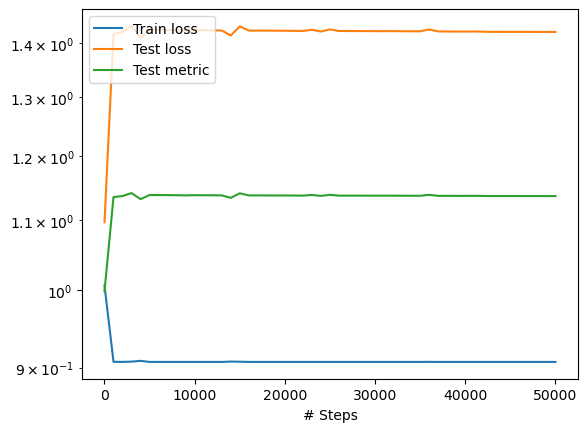

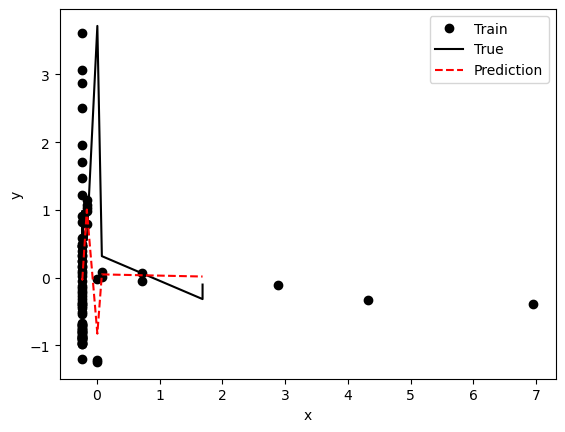

In [10]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [30]:
# 1. 读取CSV文件
df = pd.read_csv("./changhua_data.csv")

# 2. 提取并处理时间列 (第1列)
# 使用 pandas 将时间转换为 datetime 对象
df['time'] = pd.to_datetime(df.iloc[:, 0])

# 将时间转换为数值形式，例如时间戳（秒）
x = df['time'].astype(np.int64) // 10**9  # 转换为秒级时间戳
x = x.values.reshape(-1, 1).astype(np.float32)

# 3. 分支网络输入：气象站的降雨数据 (第3到第9列)
v = df.iloc[:, 2:9].values.astype(np.float32)

# 4. 目标：流量 (第2列)
y = df.iloc[:, 1].values.reshape(-1, 1).astype(np.float32)

# 5. 使用 train_test_split 划分数据集为 80% 训练集和 20% 测试集
X_train_branch, X_test_branch, X_train_trunk, X_test_trunk, y_train, y_test = train_test_split(
    v, x, y, test_size=0.2, random_state=42
)

# 6. 构建X_train为一个元组，分别对应分支和主干网络的输入
X_train = (X_train_branch, X_train_trunk)
X_test = (X_test_branch, X_test_trunk)
print(X_train_branch.shape)
print(X_train_trunk.shape)
print(y_train.shape)
# len(X_test[1]) != y_test.shape[1]:
print(y_test.shape[1])
print(len(X_test[1]))
# X_train[0]) != y_train.shape[0]
print(len(X_train[1]))
print(y_train.shape[1])

(7496, 7)
(7496, 1)
(7496, 1)
1
1875
7496
1


In [27]:
data = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test  # 假设你有测试数据
)

# 7. 现在你可以将这些数据用于 DeepONet 的输入

# 然后定义网络并训练
m = 100  # 假设有100个气象站输入
dim_x = 1  # 时间作为输入维度
net = dde.nn.DeepONetCartesianProd(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])
losshistory, train_state = model.train(iterations=10000)


ValueError: The training dataset does not have the format of Cartesian product.

Compiling model...
Building DeepONetCartesianProd...
'build' took 0.079756 s

'compile' took 0.298074 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.70e-01]    [3.57e-01]    [1.20e+00]    
1000      [5.89e-05]    [7.88e-05]    [3.34e-02]    
2000      [2.42e-05]    [3.69e-05]    [2.30e-02]    
3000      [1.71e-05]    [2.56e-05]    [1.96e-02]    
4000      [1.45e-05]    [2.24e-05]    [1.82e-02]    
5000      [1.72e-05]    [2.65e-05]    [1.81e-02]    
6000      [9.08e-06]    [1.51e-05]    [1.53e-02]    
7000      [3.64e-05]    [4.35e-05]    [1.85e-02]    
8000      [5.63e-06]    [1.02e-05]    [1.24e-02]    
9000      [4.68e-06]    [8.99e-06]    [1.16e-02]    
10000     [8.96e-06]    [1.26e-05]    [1.21e-02]    

Best model at step 9000:
  train loss: 4.68e-06
  test loss: 8.99e-06
  test metric: [1.16e-02]

'train' took 6.435023 s



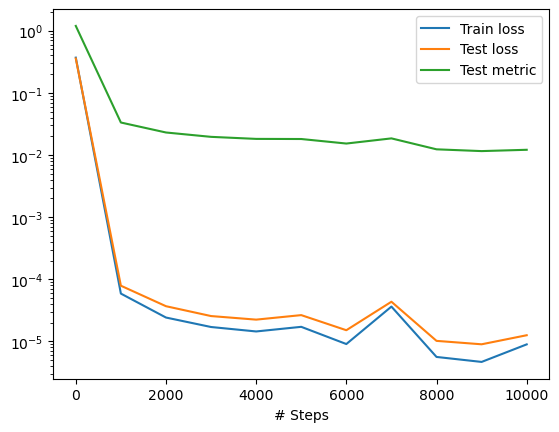

In [25]:

# Load dataset
d = np.load("/Users/zjr/Downloads/antiderivative_aligned_train.npz", allow_pickle=True)
X_train = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_train = d["y"].astype(np.float32)
d = np.load("/Users/zjr/Downloads/antiderivative_aligned_test.npz", allow_pickle=True)
X_test = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_test = d["y"].astype(np.float32)

data = dde.data.TripleCartesianProd( 
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
)

# Choose a network
m = 100
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

# Define a Model
model = dde.Model(data, net)

# Compile and Train
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.show()

In [12]:
import numpy as np
file_path="/Users/zjr/Downloads/antiderivative_aligned_test.npz"
poem=np.load(file_path,allow_pickle=True)
poem.files

['X', 'y']

In [14]:
x,y = poem['X'],poem['y']

In [15]:
print(type(x))

<class 'numpy.ndarray'>


In [17]:
print(x[0])

[[ 1.13559229  1.18658295  1.23654145 ... -0.00598001 -0.00683875
  -0.00620564]
 [ 0.34485576  0.37422643  0.40376348 ...  0.88981799  0.8808546
   0.87266277]
 [ 0.113323    0.1569542   0.20032994 ...  1.54075153  1.53433552
   1.52788084]
 ...
 [ 1.06821886  1.04805073  1.02740735 ...  0.84866501  0.83641653
   0.82352462]
 [ 0.93242467  0.90473566  0.87701723 ...  0.23970087  0.23623691
   0.23254156]
 [-0.6613804  -0.67716221 -0.69277879 ... -1.2770696  -1.26323951
  -1.24839845]]


In [18]:
print(x[1])

[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]
 [0.05050505]
 [0.06060606]
 [0.07070707]
 [0.08080808]
 [0.09090909]
 [0.1010101 ]
 [0.11111111]
 [0.12121212]
 [0.13131313]
 [0.14141414]
 [0.15151515]
 [0.16161616]
 [0.17171717]
 [0.18181818]
 [0.19191919]
 [0.2020202 ]
 [0.21212121]
 [0.22222222]
 [0.23232323]
 [0.24242424]
 [0.25252525]
 [0.26262626]
 [0.27272727]
 [0.28282828]
 [0.29292929]
 [0.3030303 ]
 [0.31313131]
 [0.32323232]
 [0.33333333]
 [0.34343434]
 [0.35353535]
 [0.36363636]
 [0.37373737]
 [0.38383838]
 [0.39393939]
 [0.4040404 ]
 [0.41414141]
 [0.42424242]
 [0.43434343]
 [0.44444444]
 [0.45454545]
 [0.46464646]
 [0.47474747]
 [0.48484848]
 [0.49494949]
 [0.50505051]
 [0.51515152]
 [0.52525253]
 [0.53535354]
 [0.54545455]
 [0.55555556]
 [0.56565657]
 [0.57575758]
 [0.58585859]
 [0.5959596 ]
 [0.60606061]
 [0.61616162]
 [0.62626263]
 [0.63636364]
 [0.64646465]
 [0.65656566]
 [0.66666667]
 [0.67676768]
 [0.68686869]
 [0.6969697 ]
 [0.70707071]
 [0.71

In [19]:
print(y)

[[ 0.00000000e+00  1.14968030e-02  2.35045483e-02 ...  1.10998991e+00
   1.10990666e+00  1.10982870e+00]
 [ 0.00000000e+00  3.48340427e-03  7.24505209e-03 ...  1.07320015e+00
   1.08226140e+00  1.09121470e+00]
 [ 0.00000000e+00  1.18982475e-03  2.78579929e-03 ...  1.26745167e+00
   1.28305327e+00  1.29858643e+00]
 ...
 [ 0.00000000e+00  1.07797370e-02  2.13171745e-02 ...  7.38145115e-01
   7.46785230e-01  7.55299976e-01]
 [ 0.00000000e+00  9.40421810e-03  1.86140352e-02 ...  3.32005167e-01
   3.34425271e-01  3.36822577e-01]
 [ 0.00000000e+00 -6.68871101e-03 -1.34907917e-02 ... -1.11951271e+00
  -1.13248393e+00 -1.14531770e+00]]


In [21]:
print(x[0].shape)
print(x[1].shape)
print(y.shape)

(1000, 100)
(100, 1)
(1000, 100)


In [33]:
import numpy as np
import pandas as pd
import deepxde as dde
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./changhua_data.csv')

# Extract columns
# Assume: First column is time, second column is flow, third to ninth are rainfall data
times = pd.to_datetime(data.iloc[:, 0].values)  # Convert time to datetime
flows = data.iloc[:, 1].values.reshape(-1, 1)
rainfalls = data.iloc[:, 2:].values

# Create sequences for time-series prediction
def create_sequences(data, target, input_steps, output_steps):
    X, y, times_seq = [], [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i:(i + input_steps), :])
        y.append(target[(i + input_steps):(i + input_steps + output_steps), 0])
        times_seq.append(times[i + input_steps:(i + input_steps + output_steps)])
    return np.array(X), np.array(y), np.array(times_seq)

input_steps = 12  # Use past 12 hours
output_steps = 6  # Predict next 6 hours

# Data preprocessing
scaler_flow = MinMaxScaler()
flows_scaled = scaler_flow.fit_transform(flows)

scaler_rainfall = MinMaxScaler()
rainfalls_scaled = scaler_rainfall.fit_transform(rainfalls)

# Combine rainfall and flow data for sequence creation
combined_data = np.concatenate((rainfalls_scaled, flows_scaled), axis=1)

# Create sequences
X, y, times_seq = create_sequences(combined_data, flows_scaled, input_steps, output_steps)

# Train-test split
X_train, X_test, y_train, y_test, times_train, times_test = train_test_split(X, y, times_seq, test_size=0.2, random_state=42)

# Define DeepONet model using DeepXDE
# branch = dde.maps.FNN([input_steps * (X_train.shape[2] - 1), 64, 32], "relu", "Glorot normal")
# trunk = dde.maps.FNN([input_steps, 64, 32], "relu", "Glorot normal")
# net = dde.maps.DeepONet(branch, trunk)

branch = dde.maps.FNN([input_steps * (X_train.shape[2] - 1), 64, 32], "relu", "Glorot normal")
trunk = dde.maps.FNN([input_steps, 64, 32], "relu", "Glorot normal")
net = dde.maps.DeepONet(branch, trunk, activation="relu", kernel_initializer="Glorot normal")

model = dde.Model(data=None, net=net)
model.compile("adam", lr=0.001, metrics=["mae"])

# Prepare data for DeepONet
branch_train = X_train[:, :, :-1].reshape(len(X_train), -1)
trunk_train = X_train[:, :, -1:].reshape(len(X_train), -1)
y_train_flat = y_train.reshape(-1, output_steps)

branch_test = X_test[:, :, :-1].reshape(len(X_test), -1)
trunk_test = X_test[:, :, -1:].reshape(len(X_test), -1)
y_test_flat = y_test.reshape(-1, output_steps)

# Train the model
losshistory, train_state = model.train([branch_train, trunk_train], y_train_flat, epochs=100, batch_size=16, validation_data=([branch_test, trunk_test], y_test_flat))

# Evaluate the model
evaluation = model.evaluate([branch_test, trunk_test], y_test_flat)
print(f'Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}')

# Make predictions
predictions = model.predict([branch_test, trunk_test])

# Inverse transform the predicted flows to original scale
predicted_flows = scaler_flow.inverse_transform(predictions.reshape(-1, 1)).reshape(-1, output_steps)
y_test_inverse = scaler_flow.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, output_steps)

# Display predictions
results = pd.DataFrame({'Actual Flow': y_test_inverse.flatten(), 'Predicted Flow': predicted_flows.flatten()})
print(results.head())

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_inverse.flatten(), predicted_flows.flatten())
mape = mean_absolute_percentage_error(y_test_inverse.flatten(), predicted_flows.flatten())
r2 = r2_score(y_test_inverse.flatten(), predicted_flows.flatten())
print(f'MAE: {mae}, MAPE: {mape}, R^2: {r2}')

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(losshistory.loss_train, label='Training Loss')
plt.plot(losshistory.loss_test, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Plot rainfall-flow dual-axis chart for actual vs predicted flows along with aggregated rainfall
fig, ax1 = plt.subplots(figsize=(15, 10))

# Use first 100 data points for plotting
time_steps = np.arange(100)
aggregated_rainfall = scaler_rainfall.inverse_transform(X_test[:100, :, :-1].reshape(-1, X_test.shape[2] - 1)).sum(axis=1).reshape(100, -1).mean(axis=1)

# Plot aggregated rainfall as a bar chart, pointing downwards
ax1.bar(time_steps, -aggregated_rainfall, color='tab:green', alpha=0.5, label='Aggregated Rainfall')
ax1.invert_yaxis()

ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Aggregated Rainfall (mm)')
ax1.legend(loc='upper right')
ax1.set_title('Rainfall and Flow Relationship')

# Plot actual and predicted flow
actual_flow = y_test_inverse[:100, 0]
predicted_flow = predicted_flows[:100, 0]

ax2 = ax1.twinx()
ax2.plot(time_steps, actual_flow, label='Actual Flow', color='blue', alpha=0.7)
ax2.plot(time_steps, predicted_flow, label='Predicted Flow', color='red', linestyle='dashed', alpha=0.7)

ax2.set_ylabel('Flow (m^3/s)')
ax2.legend(loc='upper left')

plt.show()

Compiling model...
Building DeepONet...


TypeError: 'FNN' object is not subscriptable